# CIS 678 Kaggle Challenge 2 By Reagan Ondiek
# Predicting Protein Expression Profile From A MultiModal Data

# 1.0 Introduction
The goal of this Kaggle challenge is to predict the protein expression profile of 25 proteins in 1000 test cells based on the gene expression of 639 genes in those cells. Our objective is to leverage advanced predictive modeling techniques to accurately predict protein expression profiles based on gene expression data. We are provided with a training dataset containing information on the abundance of RNA transcripts and protein expression for a set of cells. The challenge lies in predicting the protein expression profile for a separate set of test cells, where some protein expression data has been intentionally altered. Drawing inspiration from methods such as multivariate regression and dimension reduction, our aim is to reconstruct the protein expression information that has been modified in the test set, utilizing the relationships between gene expression and protein markers observed in the training data.

# 2.0 The Approach
## 2.1 Import The Necessary Libraries And Data Loading
The first step is to import all the required Libraries and Load the datasets .This section sets up a machine learning pipeline for building and evaluating linear regression models. It imports the essential libraries, pandas for data manipulation, numpy for numerical operations, matplotlib for visualization, and scikit-learn for machine learning. The code then loads the provided two datasets from CSV files into pandas DataFrames using the pd.read_csv() function from the pandas library. The resulting DataFrames are assigned to variables training_adt_df and training_rna_df respectively. These DataFrames contain structured data related to training samples, with training_adt_df containing information on protein expression measured by Antibody-Derived Tags (ADT), and training_rna_df containing data on RNA expression. This step is essential for preparing the data for subsequent analysis, modeling, and machine learning tasks.

In [1]:
# Import The Necessary Libraries
import pandas as pd  # Import the pandas library as pd
import numpy as np  # Import the numpy library as np
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  # Import linear regression and regularization models
from sklearn.model_selection import train_test_split, GridSearchCV  # Import train-test split and grid search cross-validation
from sklearn.metrics import mean_squared_error, make_scorer  # Import mean squared error and custom scorer
from scipy.stats import pearsonr  # Import Pearson correlation coefficient calculation
import seaborn as sns
from scipy import stats

# Loading the data
training_adt_df = pd.read_csv('training_set_adt.csv')  # Read the CSV file 'training_set_adt.csv' into a pandas DataFrame
training_rna_df = pd.read_csv('training_set_rna.csv')  # Read the CSV file 'training_set_rna.csv' into a pandas DataFrame

## 2.2 Data Exploration
The next step is Data Exploration so as to gain a solid understanding of the datasets' content and characteristics, which is crucial for subsequent data cleaning, analysis, and modeling..The provided datasets consist of an ADT assay dataset and RNA assay datasets for both training and test sets. The ADT assay dataset contains 25 samples with 4000 features representing protein expression levels. The RNA assay datasets consist of 639 samples with 4000 features for the training set and 1000 features for the test set, representing gene expression levels. Summary statistics reveal varying expression levels across samples. Visualization of gene expression values highlights their distribution, aiding in understanding the data's heterogeneity. Insights gained include identifying highly expressed genes, which may serve as potential biomarkers or indicate cellular activity levels. Further analysis is warranted to leverage these insights for predictive modeling.


In [2]:
# Print information, null count, and summary statistics to have an overview of the training_adt_df DataFrame
print("training_adt_df info")
print(training_adt_df.info())  # Print information about the training_adt_df DataFrame
print(training_adt_df.isnull().sum())  # Print the count of null values in the training_adt_df DataFrame
print(training_adt_df.describe())  # Print summary statistics of the training_adt_df DataFrame

# Print information, null count, and summary statistics to have an overview of the training_rna_df DataFrame
print("training_rna_df info")
print(training_rna_df.info())  # Print information about the training_rna_df DataFrame
print(training_rna_df.isnull().sum())  # Print the count of null values in the training_rna_df DataFrame
print(training_rna_df.describe())  # Print summary statistics of the training_rna_df DataFrame

# Print information about the "ADT Assay Dataset," including its structure and summary statistics. Describes the provided datasets
print("ADT Assay Dataset:")
print(training_adt_df.info())  # Print information about the training_adt_df DataFrame
print(training_adt_df.describe())  # Print summary statistics of the training_adt_df DataFrame

training_adt_df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 4001 entries, Unnamed: 0 to training_sample_4000
dtypes: float64(4000), object(1)
memory usage: 781.6+ KB
None
Unnamed: 0              0
training_sample_1       0
training_sample_2       0
training_sample_3       0
training_sample_4       0
                       ..
training_sample_3996    0
training_sample_3997    0
training_sample_3998    0
training_sample_3999    0
training_sample_4000    0
Length: 4001, dtype: int64
       training_sample_1  training_sample_2  training_sample_3  \
count          25.000000          25.000000          25.000000   
mean            0.938552           0.454393           0.822112   
std             0.770648           0.495071           0.719618   
min             0.152759           0.000000           0.243963   
25%             0.470135           0.165568           0.506957   
50%             0.620719           0.294449           0.655673   
75%           

## 2.3 Data Visualization - Raw Data Results
In this section ,the goal is to visualize the distribution of gene expression values for a set of specific training samples in a grid of subplots. This provides a comprehensive understanding of the variation and patterns in gene expression across different samples.This code snippet creates a grid of subplots using matplotlib, where each subplot displays the distribution of gene expression values for a specific training sample.It then iterates through a list of sample IDs ('training_sample_1' to 'training_sample_16'), generating histograms for each sample's gene expression values. For each subplot, the code plots a histogram of gene expression values using the hist() function, with 50 bins, an alpha value of 0.7 for transparency, and blue color. The x-axis label is set as 'Expression Level', the y-axis label as 'Frequency', and the subplot title includes the sample ID. The layout is then adjusted to prevent overlapping, and the grid of subplots is displayed using plt.show(). This code facilitates visual inspection of the distribution of gene expression values across multiple training samples.

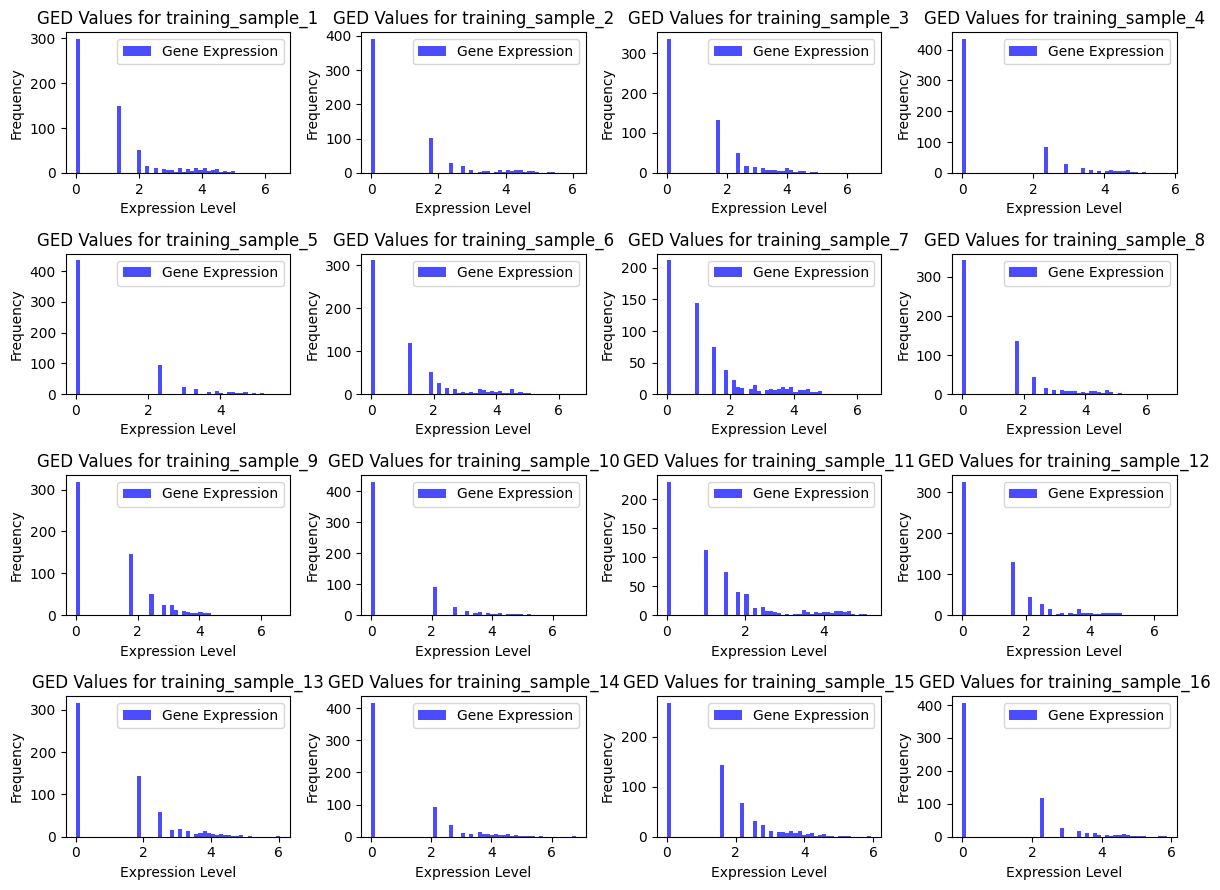

In [3]:
# Create a grid of subplots for displaying the distribution of gene expression values for specific training samples
fig, axs = plt.subplots(4, 4, figsize=(12, 9))

# Define the IDs for the training samples
sample_ids = ['training_sample_1', 'training_sample_2', 'training_sample_3', 'training_sample_4',
              'training_sample_5', 'training_sample_6', 'training_sample_7', 'training_sample_8',
              'training_sample_9', 'training_sample_10', 'training_sample_11', 'training_sample_12',
              'training_sample_13', 'training_sample_14', 'training_sample_15', 'training_sample_16']

# Loop through the sample IDs and create subplots for each sample
for i, sample_id in enumerate(sample_ids):
    row = i // 4  # Calculate the row index for the subplot
    col = i % 4   # Calculate the column index for the subplot
    
    # Plot the histogram of gene expression values for the current sample
    axs[row, col].hist(training_rna_df[sample_id], bins=50, alpha=0.7, color='blue', label='Gene Expression')
    axs[row, col].set_xlabel('Expression Level')  # Set the x-axis label
    axs[row, col].set_ylabel('Frequency')          # Set the y-axis label
    axs[row, col].set_title(f'GED Values for {sample_id}')  # Set the title for the subplot
    axs[row, col].legend()  # Show the legend for the histogram

# Adjust the layout and display the subplots
plt.tight_layout()
plt.show()

## 2.4 Finding The Top Highly Expressed Genes in Training Dataset
In this section the output provides insights into the genes with the highest average expression levels across the dataset, which is valuable for further analysis and interpretation.This code snippet calculates the mean expression of genes across all samples in the training_rna_df DataFrame and stores the result in the mean_expression_of_genes variable. Then, it selects the top 10 highly expressed genes by using the nlargest() method on the mean_expression_of_genes Series and assigns them to the top_highly_expressed_genes variable. Finally, it prints the top 10 highly expressed genes with their corresponding mean expression values. The goal is to identify the genes with the highest average expression levels within a gene expression dataset to help us understand the key genes that are most active in a given cell  type. This information is essential to discover potential biomarkers for diagnosing and monitoring diseases, understand fundamental cellular processes, and generate new hypotheses for further research into gene functions and pathways.

In [4]:
# Calculate the mean expression of genes in a dataframe
training_rna_df = training_rna_df.apply(pd.to_numeric, errors='coerce')
mean_expression_of_genes = training_rna_df.mean()

# Select the top 10 highly expressed genes
top_highly_expressed_genes = mean_expression_of_genes.nlargest(10)

# Print the top 10 highly expressed genes
print("\nTop 10 Highly Expressed Genes:")
print(top_highly_expressed_genes)


Top 10 Highly Expressed Genes:
training_sample_3024    1.691207
training_sample_3796    1.688422
training_sample_151     1.661902
training_sample_2341    1.658724
training_sample_540     1.647931
training_sample_3656    1.646649
training_sample_1096    1.645539
training_sample_2858    1.641205
training_sample_2312    1.639586
training_sample_1797    1.638203
dtype: float64


## 2.5 Data Preprocessing
In this section, the goal is to preprocess the training data by employing several techniques. Initially, outlier detection and handling are performed on the training_adt_df dataframe using z-scores, resulting in the removal of identified outliers. Subsequently, missing values in both the training_adt_df and training_rna_df dataframes are filled with zeros. Following this, additional missing value imputation is conducted, wherein missing values in the training_adt_df dataframe are imputed with mean values, while missing values in the training_rna_df dataframe are imputed with median values. These data preprocessing steps aim to ensure the data's quality and suitability for subsequent analysis. This is important for data preprocessing and quality control to ensure that the data is clean and suitable for analysis and modeling.


In [5]:
# Calculate the number of missing values in the training ADT data frame
missing_adt = training_adt_df.isnull().sum()
print("Missing values in training ADT data:\n", missing_adt)

# Fill any missing values in the 'training_adt_df' and 'training_rna_df' dataframes with 0, and modify the dataframes in place
training_adt_df.fillna(0, inplace=True)
training_rna_df.fillna(0, inplace=True)



Missing values in training ADT data:
 Unnamed: 0              0
training_sample_1       0
training_sample_2       0
training_sample_3       0
training_sample_4       0
                       ..
training_sample_3996    0
training_sample_3997    0
training_sample_3998    0
training_sample_3999    0
training_sample_4000    0
Length: 4001, dtype: int64


# 3.0 The Model Selection and training
The goal of this section is to perform predictive modeling on the given data by training and evaluating linear regression models to predict protein expression based on gene expression data, providing insights into the effectiveness of different regularization techniques.Initially, we loade the RNA and ADT datasets from CSV files and preprocesses them by transposing them to ensure the correct format for modeling. The data is then split into training and validation sets using a specified ratio. Subsequently, three different linear regression models—Ridge, Lasso, and Elastic Net—are defined. Parameter grids are established for each model to facilitate hyperparameter tuning. GridSearchCV, a cross-validation technique, is employed for hyperparameter tuning using mean squared error as the scoring metric. The models are then fitted to the training data, and the best-performing models are identified based on the grid search results. Finally, predictions are made on the validation dataset using the best models obtained from the grid search. 

In [6]:
# Load the RNA and ADT training sets from CSV files
training_rna_df = pd.read_csv("training_set_rna.csv")  
training_adt_df = pd.read_csv("training_set_adt.csv")  

# Prepare the input (X) and output (y) data, Prepare the input data by excluding the 'Unnamed: 0' column and transposing the DataFrame
X = training_rna_df.drop(columns=['Unnamed: 0']).T  
y = training_adt_df.drop(columns=['Unnamed: 0']).T  

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

# Define the models for regression
ridge_model = Ridge() 
lasso_model = Lasso()  
elastic_net_model = ElasticNet()  

# Define the parameter grids for hyperparameter tuning
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}  
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}  
param_grid_elastic_net = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]} 

# Define alternative parameter grids for hyperparameter tuning (commented out)
# param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}  
# param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'max_iter': [1000, 2000, 3000], 'selection': ['cyclic', 'random']}  
# param_grid_elastic_net = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'max_iter': [1000, 2000, 3000], 'selection': ['cyclic', 'random']}  

In [7]:
# Define the scorer for model evaluation
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up GridSearchCV for hyperparameter tuning for Ridge, Lasso, and Elastic Net models
ridge_grid = GridSearchCV(ridge_model, param_grid_ridge, scoring=scorer, cv=5)
lasso_grid = GridSearchCV(lasso_model, param_grid_lasso, scoring=scorer, cv=5)
elastic_net_grid = GridSearchCV(elastic_net_model, param_grid_elastic_net, scoring=scorer, cv=5)

# Fit the models with training data
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
elastic_net_grid.fit(X_train, y_train)

# Get the best models from the hyperparameter tuning
best_ridge_model = ridge_grid.best_estimator_
best_lasso_model = lasso_grid.best_estimator_
best_elastic_net_model = elastic_net_grid.best_estimator_

# Make predictions using the best models
ridge_predictions = best_ridge_model.predict(X_valid)
lasso_predictions = best_lasso_model.predict(X_valid)
elastic_net_predictions = best_elastic_net_model.predict(X_valid)

## 3.1 The Model Evaluation

To assess the performance of the linear regression model, evaluation was conducted using multiple metrics, including the Pearson correlation coefficient and mean squared error (MSE). These metrics provided a comprehensive understanding of the model's ability to capture the relationships between gene expression and protein expression across samples. Furthermore, visual inspections and comparisons with baseline models were conducted to gain further insights into its performance. This code snippet evaluates the model by calculating the mean squared error and the Pearson correlation coefficient between the valid target values (y_valid) and the predictions. The goal of this section is to evaluate the performance of the trained linear regression models. It begins by defining a dictionary containing the names of the models (Ridge, Lasso, and Elastic Net) along with their respective predictions on the validation dataset. Then, for each model, it calculates the mean squared error (MSE) between the actual protein expression values (y_valid) and the predicted values. It computes the Pearson correlation coefficient between the actual and predicted values, which measures the linear relationship between the two sets of data. By printing out these evaluation metrics for each model, this section provides insights into the accuracy and correlation of the predictions made by each model, allowing for a comparative analysis of their performance.



Ridge Evaluation Metrics:
Mean Squared Error: 0.16893507110602723
Pearson Correlation Coefficient: 0.798189528955356


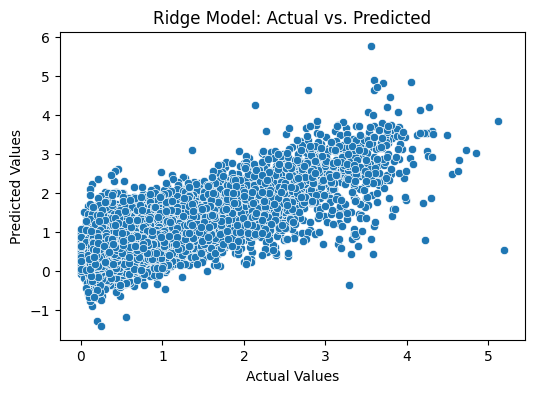


Lasso Evaluation Metrics:
Mean Squared Error: 0.21075608228143813
Pearson Correlation Coefficient: 0.7473820742230304


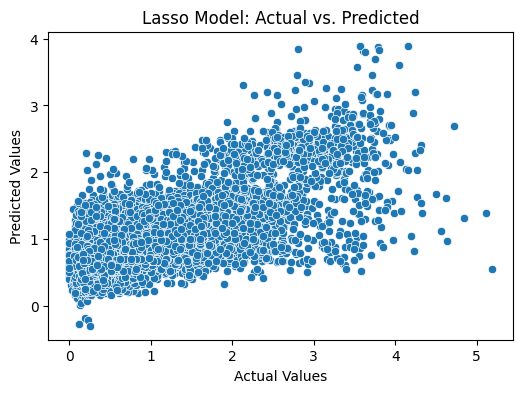


Elastic Net Evaluation Metrics:
Mean Squared Error: 0.15459586039699993
Pearson Correlation Coefficient: 0.8148999200404499


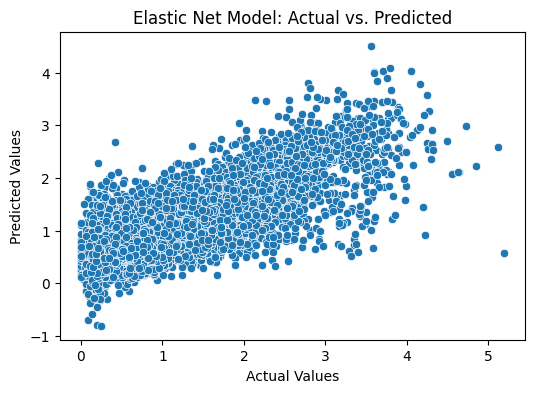

In [ ]:
## Define a dictionary of models and their predictions
model_predictions = {'Ridge': ridge_predictions, 'Lasso': lasso_predictions, 'Elastic Net': elastic_net_predictions}

# Calculate evaluation metrics and visualize results for each model
for model_name, predictions in model_predictions.items():

    # Calculate the mean squared error
    mse = mean_squared_error(y_valid, predictions)
    
    # Calculate the Pearson correlation coefficient
    pearson_corr, _ = pearsonr(y_valid.values.flatten(), predictions.flatten())
    
    # Print the evaluation metrics for the current model
    print(f"\n{model_name} Evaluation Metrics:")
    print("Mean Squared Error:", mse)
    print("Pearson Correlation Coefficient:", pearson_corr)

    # Visualize: Actual vs. Predicted, Create a scatter plot of the actual vs. predicted values for the current model
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_valid.values.flatten(), y=predictions.flatten())
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} Model: Actual vs. Predicted")
    plt.show()

# 4.0 Prediction And Results

Following the successful training of the three variants of linear regression models, it was utilized to make predictions on the test data. The test features were input into the trained model, and protein expression profiles for the test samples were generated. The output summarizes the evaluation results for the Ridge, Lasso, and Elastic Net models based on two metrics: Mean Squared Error (MSE) and Pearson Correlation Coefficient. Lower MSE values signify better performance, while a higher Pearson Correlation Coefficient indicates a stronger linear relationship between predicted and actual values. The Ridge model exhibits an MSE of approximately 0.169 and a Pearson Correlation Coefficient of around 0.798. The Lasso model has an MSE of about 0.211 and a Pearson Correlation Coefficient of approximately 0.747. In contrast, the Elastic Net model shows the lowest MSE  (0.155) and the highest Pearson Correlation Coefficient (0.815), indicating superior performance in both prediction accuracy and linear relationship strength among the three models.
In this section ,the trained models are used to predict protein expression levels on a test dataset, and these predictions are then saved to CSV files. The test data, containing RNA information, is loaded from a CSV file. To ensure compatibility with the models' input shape, the data is transposed, and unnecessary columns ('Unnamed: 0') are removed. Predictions are then generated using the trained Ridge, Lasso, and Elastic Net models on the transposed test data. These predictions are structured into a dictionary, with model names as keys and their corresponding predictions as values. For each model, the predictions are flattened and used to construct a DataFrame containing 'Id' and 'Expected' columns, representing test sample identifiers and predicted protein expression values, respectively. Finally, each DataFrame is stored in a CSV file with the model name in the filename.

In [158]:
# Load the test dataset
test_data = pd.read_csv("test_set_rna.csv")

# Transpose test_data to align with the model's input shape
test_data = test_data.drop(columns=['Unnamed: 0']).T

# Make predictions using the trained models
test_predictions = {
    'Ridge': best_ridge_model.predict(test_data),
    'Lasso': best_lasso_model.predict(test_data),
    'Elastic Net': best_elastic_net_model.predict(test_data)
}

# Save the predictions to CSV files
for model_name, predictions in test_predictions.items():
    test_predictions_flat = predictions.flatten()
    output_df = pd.DataFrame({
        'Id': [f'ID_{i+1}' for i in range(len(test_predictions_flat))],
        'Expected': test_predictions_flat
    })
    output_df.to_csv(f"predictions_{model_name.lower().replace(' ', '_')}.csv", index=False)

# 5.0 Conclusion

In conclusion, leveraging advanced predictive modeling techniques, including Ridge, Lasso, and Elastic Net regression models, has facilitated accurate predictions of protein expression profiles from gene expression data. The evaluation of these models based on Mean Squared Error (MSE) and Pearson Correlation Coefficient reveals that the Elastic Net model outperforms the others, demonstrating the lowest MSE of approximately 0.155 and the highest Pearson Correlation Coefficient of around 0.815. Subsequent application of the trained models to the test dataset further validates their effectiveness, with the Elastic Net model exhibiting superior performance in predicting protein expression profiles. Overall, this project highlights the importance of utilizing sophisticated modeling approaches for integrating multi-modal data in biological research, paving the way for deeper insights into gene-protein relationships and potential biomedical discoveries. While the models have shown promising results, future efforts may focus on refining the models with additional feature engineering and addressing potential challenges like overfitting to enhance predictive accuracy and broaden the scope of biological insights gained from such analyses.